# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.646774e+01     1.396518e+01
 * time: 0.0013689994812011719
     1     3.517432e+01     9.896614e+00
 * time: 0.004703998565673828
     2     2.448164e+01     4.472846e+00
 * time: 0.010395050048828125
     3     2.075502e+01     1.941126e+00
 * time: 0.0151519775390625
     4     1.947054e+01     1.834777e+00
 * time: 0.060279130935668945
     5     1.873345e+01     1.911212e+00
 * time: 0.06371808052062988
     6     1.828978e+01     1.453387e+00
 * time: 0.06714296340942383
     7     1.788181e+01     1.067339e+00
 * time: 0.07054400444030762
     8     1.765362e+01     8.208666e-01
 * time: 0.07393217086791992
     9     1.749112e+01     7.641864e-01
 * time: 0.07735896110534668
    10     1.738106e+01     7.291407e-01
 * time: 0.08134818077087402
    11     1.734277e+01     9.234722e-01
 * time: 0.08455204963684082
    12     1.729388e+01     6.621132e-01
 * time: 0.08768606185913086
    13     1.726079e+01     6.664538e-01
 * t

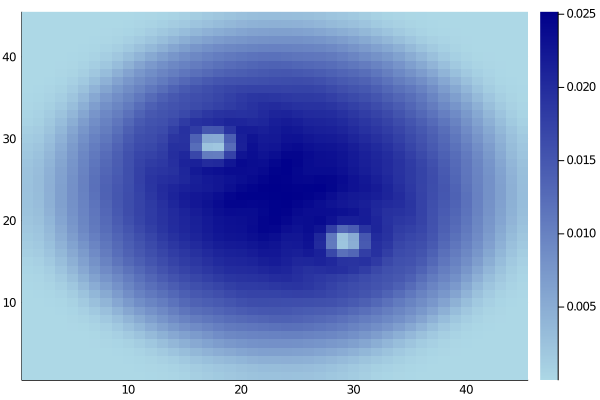

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)